<center>

<img src="https://upload.wikimedia.org/wikipedia/fr/thumb/d/d9/Logo_Télécom_ParisTech.svg/1200px-Logo_Télécom_ParisTech.svg.png" width=150px/>

</center>

<h1><center><strong><font color="chillipepper">IA705 - Apprentissage pour la robotique</font></strong></center></h1>
<h2><center><font color="blue"><strong> Projet Robotique : "Poppy Torso" </strong></font></center></h2>

<br/>

<center>
<h4> Subject of Mrs Sao Mai NGUYEN &  Mr Damien BOUCHABOU </h4> 
</center>

<br/>

<center>
<h3> <b> Done by: Yannick LETORT, Ahmed BELAAJ & Nour BEN REJEB </b> </h3> 
</center>

<br/>

## Introduction 👉

This project aims to enhance and extend the capabilities of the Poppy Torso by implementing reinforcement learning (RL) and/or inverse reinforcement learning (IRL) techniques. Unlike the deterministic approach of traditional inverse kinematics, RL and IRL offer a dynamic method to model and execute complex behaviors that can adapt over time through interactions with the environment. This project seeks not only to emulate human movements more naturally but also to enable the robot to learn from these movements dynamically.

## Steps of the project ⏭

Our project involves:
1.	**Developing a Custom Gym Environment:** We create a simulation environment tailored for the Poppy Torso using the Gym framework. This environment will enable to connect to the COPPELIA SIM API and will serve as a testbed for developing and refining our RL algorithm, ensuring that it can operate effectively within the physical constraints and capabilities of the robot.
2.	**Implementing Reinforcement Learning:** Using Soft Actor-Critic (SAC), the robot will learn to perform tasks through trial and error, optimizing its actions based on a reward system designed to measure the accuracy and efficiency of its movements relative to human demonstrations.
3.	**Integration and Testing:** The algorithms will be integrated with the simulated robot from COPPELIA SIM, tested to ensure they can execute the learned tasks in real-time, and refined to improve performance and reliability.

In [12]:
# Imports and installs of all necessary packages for our project
import time
import gym
import numpy as np

import numpy as np
from utils.skeleton import *
from utils.quaternion import *
import os
from pypot.creatures import PoppyTorso
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import sys
sys.path.append('./gym-examples')
import gym_examples
from gym.wrappers import FlattenObservation

from stable_baselines3 import SAC

### Creation of the custom environment 🌍

We developed a custom Gym environment that interfaces with CoppeliaSim, facilitating structured interaction loops where actions taken by the RL directly influence the robot's state, and feedback is provided in the form of observations and rewards.

#### Actions and Observations 👀

- **Actions**: The action space consists of a 2-dimensional continuous vector, controlling specific joint positions of the robot's arms, ranging from -180 to +180 degrees.
- **Observations**: The observation space is composed of 6 continuous values reflecting the positions of key joints. These values are normalized between -1 and 1.

#### Connection to CoppeliaSim 🔗

- **Simulation Control**: The environment manages the initiation, progression, and termination of simulations in CoppeliaSim, ensuring that the robot's actions are reflected in real-time within the virtual environment.
- **Real-Time Feedback**: Adjustments made by the learning algorithm are immediately applied to the robot in the simulation, allowing for dynamic testing and adjustment.

### Reward Function Design 🏆

To effectively guide the learning process, we designed a reward function that incorporates both dense and sparse components:

#### Dense Reward

- **Motivation**: Provides continuous feedback based on the proximity of the robot's end-effector to the target position.
- **Implementation**: Calculated using exponential decay relative to the Euclidean distance to the target, specifically \( e^{-10 \times \text{distance}} \), encouraging the robot to decrease its distance from the target continuously.

#### Sparse Reward

- **Motivation**: Offers additional incentives for precise alignment with the target position.
- **Implementation**: Provides a linearly scaling reward from 0 to 1 as the robot approaches within 0.3 meters of the target, maximizing at exact alignment.

#### Combined Reward Strategy

- **Integration**: The total reward is the sum of the dense and sparse rewards, balancing gradual improvement and precision achievement.
- **Objective**: This structure is designed to accelerate learning, encouraging both general approach and precise targeting behaviors.

In [13]:
# Environment initialization
env = gym.make('gym_examples/Poppy-v0') 

len idx : 12, len skeletons: 279, idx [  0  25  50  75 100 125 150 175 200 225 250 275]]


In [14]:
# Environment reset
env.reset()

array([ 0.18734759, -0.16717778, -0.00257663, -0.09800296, -0.24408023,
        0.0128354 ], dtype=float32)

## SAC Model Setup and Training Overview 🤖💻

This section of our code explains the setup and execution of the Soft Actor-Critic (SAC) model for reinforcement learning in our environment. 

The SAC algorithm is an advanced reinforcement learning method designed to efficiently solve tasks in environments with continuous action spaces. Our exploration into SAC revealed the following defining characteristics:

*  **Actor-Critic Method:** SAC employs an actor-critic framework, which utilizes two main components: an actor that suggests actions based on the current policy and a critic that evaluates these actions using a value function. This dual approach allows the algorithm to balance the exploration of new actions with the exploitation of known rewarding actions.
* **Entropy Maximization:** A distinctive feature of SAC is its incorporation of entropy into the reward structure. By maximizing entropy, the algorithm doesn't just seek to maximize the total expected return but also encourages the policy to explore more diverse actions. This leads to better exploration of the action space, which is particularly beneficial in complex environments where the agent might get stuck in local optima.
* **Off-Policy Learning:** SAC is an off-policy algorithm, meaning it can learn from past experiences stored in a replay buffer, regardless of the policy that generated those experiences. This capability allows SAC to efficiently use previous interactions by revisiting and learning from them, improving learning speed and stability.
* **Sample Efficiency:** One of the reasons we setteled for the choice of SAC for this project is its sample efficiency. SAC effectively learns optimal policies with fewer interactions with the environment compared to other RL algorithms. This efficiency is crucial in scenarios where interacting with the environment is costly or limited.


Below are the key components and configurations of the SAC setup:

- **Model Initialization**:
  - **Algorithm**: Soft Actor-Critic, as explained abovre, it's a modern algorithm known for its efficiency and performance in continuous action spaces.
  - **Policy**: `MlpPolicy` (Multilayer Perceptron), which utilizes neural networks to approximate both the policy and the value functions.
  - **Environment**: `env`, our custom simulation environment designed to challenge and train the agent.
  - **Verbose**: Set to `1` for detailed logging during training, which aids in monitoring the model's learning progress.

```python
model = SAC('MlpPolicy', env, verbose=1, batch_size=57)


In [15]:
# Model initialization of SAC
model = SAC('MlpPolicy', env, verbose=1, batch_size=57) 
model.learn(total_timesteps=57*15) # 57*15 = 855 steps = 15 seconds of simulation
model.save("sac_imitation")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 19       |
|    ep_rew_mean     | 1.99     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 2        |
|    time_elapsed    | 26       |
|    total_timesteps | 76       |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 19       |
|    ep_rew_mean     | 1.96     |
| time/              |          |
|    episodes        | 8        |
|    fps             | 2        |
|    time_elapsed    | 55       |
|    total_timesteps | 152      |
| train/             |          |
|    actor_loss      | -2.79    |
|    critic_loss     | 0.0686   |
|    ent_coef        | 0.985    |
|    ent_coef_loss   | -0.0499  |
|    learning_rate   | 0.0003   |
|    n_updates       | 51       |
----------------------

## Training Performance Summary

### Overview
This summary details the agent's training performance using the SAC algorithm, focusing on metrics that provide insight into both learning progression and computational efficiency.

### Rollout Performance

- **Average Episode Length (`ep_len_mean`)**:
  - **19 steps** for each rollout indicate that the agent consistently operates in the environment for a steady duration before termination. This stability can be beneficial for environments with short optimal paths.

- **Average Reward Per Episode (`ep_rew_mean`)**:
  - The rewards are **1.99** and **1.92**, which are relatively close across rollouts, suggesting the agent is achieving consistent performance. However, if the potential reward range is significantly higher, these values could imply there is room for optimization.

- **Episodes (`episodes`)**:
  - Completing **4** and then **8** episodes in subsequent rollouts shows an accumulating experience that helps in the agent’s learning process.

- **Frames Per Second (`fps`)**:
  - **2 fps** indicates a relatively slow processing rate, which might be due to computational limits or the complexity of state evaluations and updates.

- **Time Elapsed (`time_elapsed`)**:
  - **27 seconds** and **57 seconds** respectively for each rollout phase show increasing computational time as more episodes are processed.

- **Total Timesteps (`total_timesteps`)**:
  - **76** and **152 timesteps** cumulatively indicate how much interaction the agent has had with the environment, doubling from the first to the second phase as expected with the increase in episodes.

### Training Dynamics

- **Actor Loss (`actor_loss`)**:
  - An **actor loss of -2.79** suggests the actor network is quite effective in selecting actions that lead to higher rewards, given the negative value, implying a minimization of loss in action prediction.

- **Critic Loss (`critic_loss`)**:
  - A **critic loss of 0.0686** shows that the critic's predictions are closely aligning with the actual outcomes, which is good for stable learning.

- **Entropy Coefficient (`ent_coef`)**:
  - With an **entropy coefficient of 0.985** reducing to **0.583**, the agent's exploration is well-supported initially but lessens as it potentially converges to a policy.

- **Entropy Coefficient Loss (`ent_coef_loss`)**:
  - The **loss for the entropy coefficient of -0.0508** improving to **-0.742** indicates effective optimization of the agent's exploration-exploitation balance over time.

- **Learning Rate (`learning_rate`)**:
  - A **constant learning rate of 0.0003** ensures steady updates to the model, which is beneficial for gradual and stable improvements.

- **Number of Updates (`n_updates`)**:
  - **735 updates** suggest significant model refinement has occurred, reflecting an active learning process.

### Interpretation and Recommendations

These metrics suggest that while the agent is learning and performing with consistency, there might be room for improvement in both the speed of operation and possibly the learning configuration to achieve higher rewards if those are well below the potential maximum for the environment. The stability in episode length and moderate rewards point to an agent performing adequately but possibly stuck in local optima or requiring adjustments in policy exploration parameters to escape suboptimal policies.

## Testing and Visualizing the SAC Model's Arm Movement Predictions At each step 📉 📈

This section of our notebook demonstrates the practical application and evaluation of our trained Soft Actor-Critic (SAC) model. 

In [16]:
env.reset()

array([ 0.38043484,  0.0084121 ,  0.00639087, -0.25981012, -0.01374838,
       -0.04241291], dtype=float32)

len targets 19
targets tensor([[[ 1.6124e-01, -1.0656e-01,  5.7504e-02],
         [-1.3782e-01, -1.7450e-01,  8.4283e-02]],

        [[ 1.5924e-01, -9.3751e-02,  8.9334e-02],
         [-1.3943e-01, -1.6673e-01,  7.6397e-02]],

        [[ 1.6043e-01, -6.7575e-02,  1.1407e-01],
         [-1.4083e-01, -1.5733e-01,  6.9019e-02]],

        [[ 1.6612e-01, -5.3166e-02,  1.1734e-01],
         [-1.4136e-01, -1.5548e-01,  6.7240e-02]],

        [[ 1.6548e-01, -4.7784e-02,  1.1498e-01],
         [-1.4153e-01, -1.5368e-01,  6.6678e-02]],

        [[ 1.7116e-01, -3.3376e-02,  1.1825e-01],
         [-1.4206e-01, -1.5183e-01,  6.4899e-02]],

        [[ 1.7052e-01, -2.7993e-02,  1.1589e-01],
         [-1.4223e-01, -1.5002e-01,  6.4338e-02]],

        [[ 1.7620e-01, -1.3585e-02,  1.1915e-01],
         [-1.4276e-01, -1.4818e-01,  6.2559e-02]],

        [[ 1.7557e-01, -8.2028e-03,  1.1679e-01],
         [-1.4293e-01, -1.4637e-01,  6.1997e-02]],

        [[ 1.8156e-01,  3.7089e-03,  1.2370e-01],
         

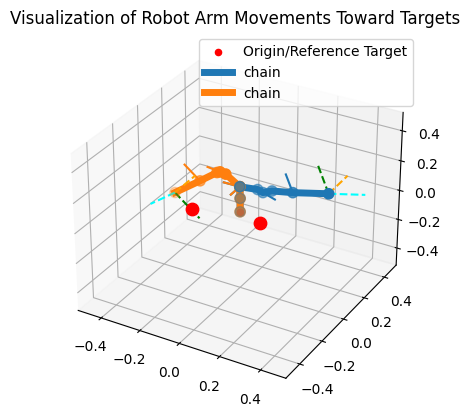

t0 tensor([ 0.1592, -0.0938,  0.0893]) and t1 tensor([-0.1394, -0.1667,  0.0764])


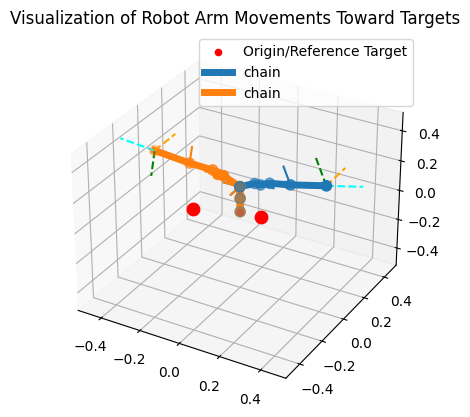

t0 tensor([ 0.1604, -0.0676,  0.1141]) and t1 tensor([-0.1408, -0.1573,  0.0690])


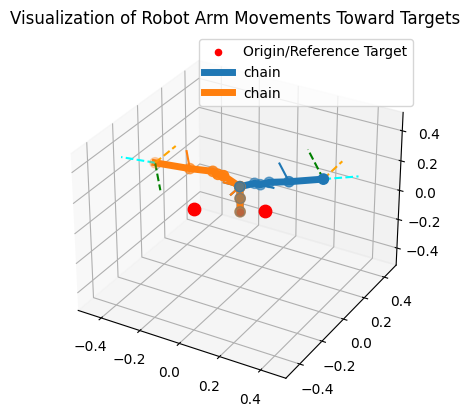

t0 tensor([ 0.1661, -0.0532,  0.1173]) and t1 tensor([-0.1414, -0.1555,  0.0672])


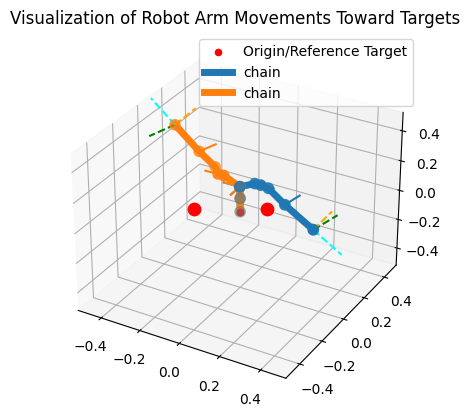

t0 tensor([ 0.1655, -0.0478,  0.1150]) and t1 tensor([-0.1415, -0.1537,  0.0667])


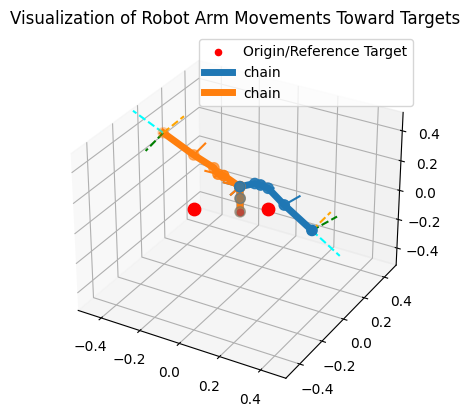

t0 tensor([ 0.1712, -0.0334,  0.1182]) and t1 tensor([-0.1421, -0.1518,  0.0649])


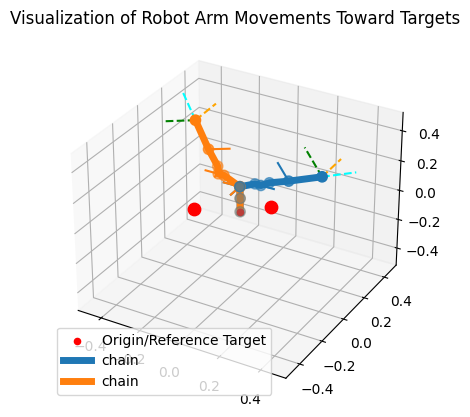

t0 tensor([ 0.1705, -0.0280,  0.1159]) and t1 tensor([-0.1422, -0.1500,  0.0643])


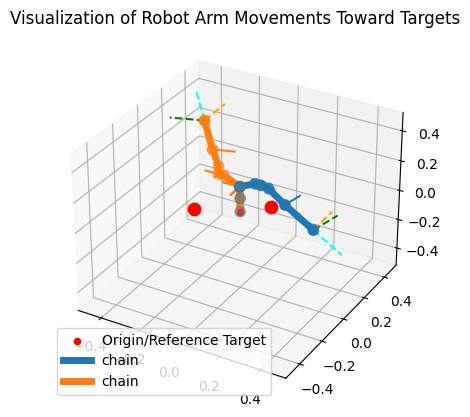

t0 tensor([ 0.1762, -0.0136,  0.1192]) and t1 tensor([-0.1428, -0.1482,  0.0626])


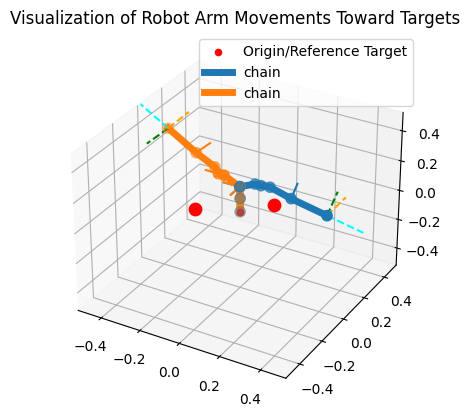

t0 tensor([ 0.1756, -0.0082,  0.1168]) and t1 tensor([-0.1429, -0.1464,  0.0620])


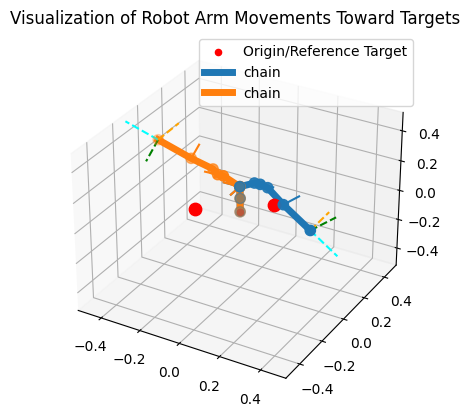

t0 tensor([0.1816, 0.0037, 0.1237]) and t1 tensor([-0.1290, -0.1547,  0.0461])


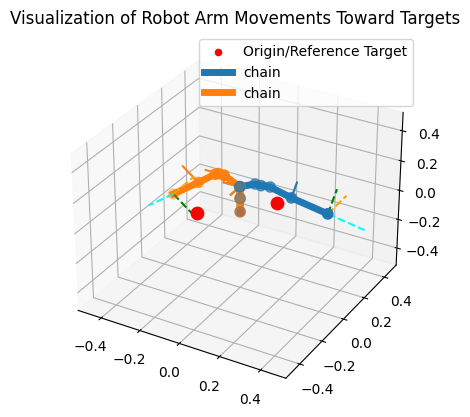

t0 tensor([ 0.1831, -0.0023,  0.1292]) and t1 tensor([-0.1313, -0.1511,  0.0169])


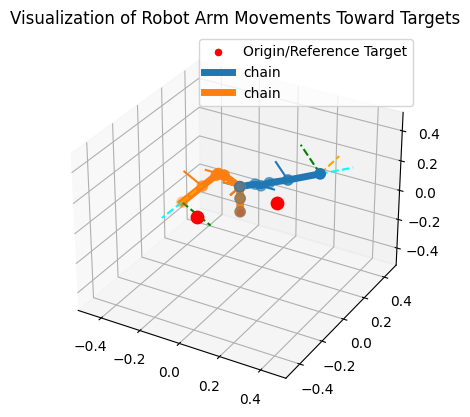

t0 tensor([1.9076e-01, 1.6239e-04, 1.4033e-01]) and t1 tensor([-0.1331, -0.1462, -0.0116])


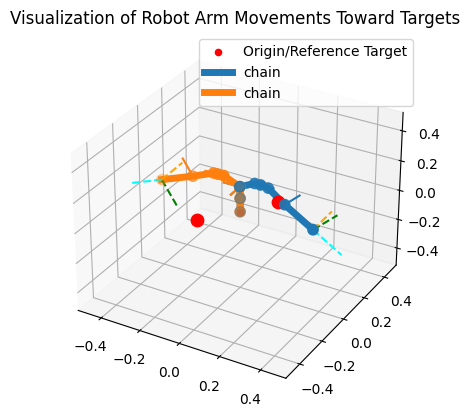

t0 tensor([0.1905, 0.0039, 0.1396]) and t1 tensor([-0.1247, -0.1508, -0.0162])


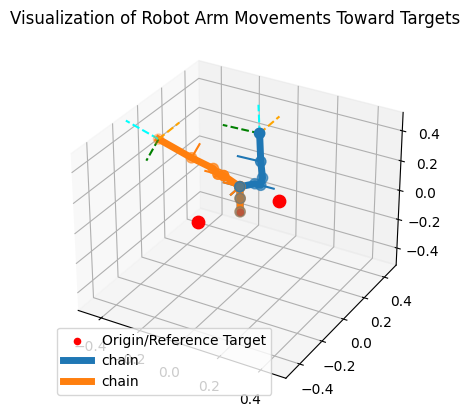

t0 tensor([0.1972, 0.0121, 0.1455]) and t1 tensor([-0.1247, -0.1518, -0.0166])


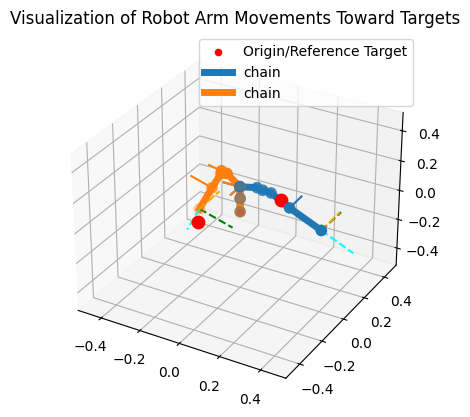

t0 tensor([ 0.1890, -0.0051,  0.1305]) and t1 tensor([-0.1244, -0.1535, -0.0121])


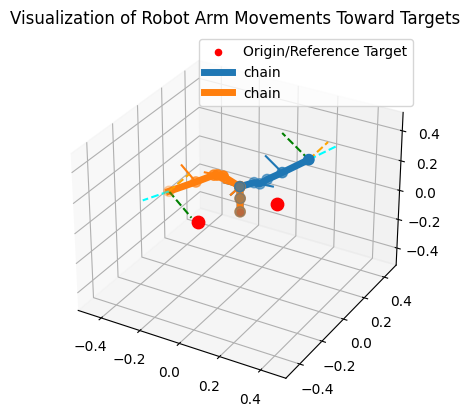

t0 tensor([ 0.1956, -0.0044,  0.1028]) and t1 tensor([-0.1233, -0.1593, -0.0066])


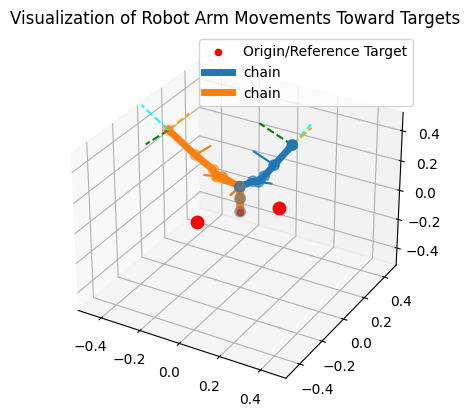

t0 tensor([ 0.1970, -0.0119,  0.0686]) and t1 tensor([-0.1219, -0.1652,  0.0007])


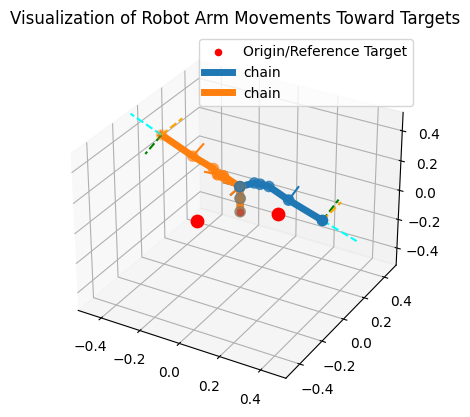

t0 tensor([ 0.2015, -0.0236,  0.0471]) and t1 tensor([-0.1210, -0.1728,  0.0063])


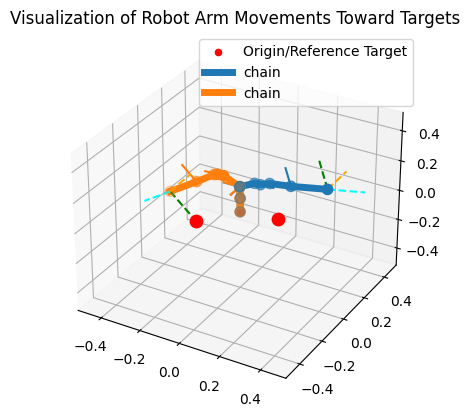

t0 tensor([ 0.1951, -0.0327,  0.0415]) and t1 tensor([-0.1206, -0.1728,  0.0075])


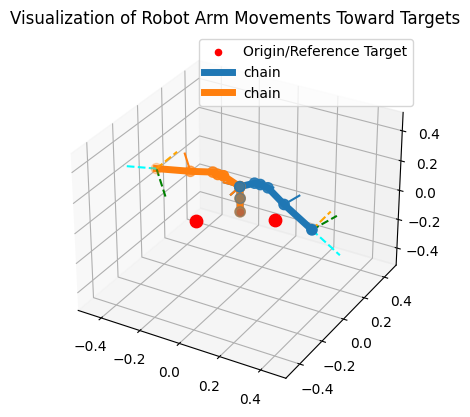

In [17]:
# Load the model
model = SAC.load("sac_imitation")

print(f"len targets {len(env.targets)}")
print(f"targets {env.targets}")

# Loop through the targets and predict the action
for t in env.targets:
    action, _states = model.predict(np.array(t.flatten()).reshape(1,-1))
    obs, rewards, dones, info = env.step(action.flatten())

    # display the arms and target
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # set the axes limits
    ax.set_xlim([-0.5, 0.5])
    ax.set_ylim([-0.5, 0.5])
    ax.set_zlim([-0.5, 0.5])

    # plot the target 
    ax.scatter([0], [0],[0])
    print(f"t0 {t[0]} and t1 {t[1]}")
    
    # Add a title to the plot
    plt.title("Visualization of Robot Arm Movements Toward Targets")

    # Plotting arms and targets with labels for the legend
    ax.scatter([0], [0], [0], color='red', label='Origin/Reference Target')
    env.poppy.l_arm_chain.plot(env.poppy.l_arm_chain.convert_to_ik_angles(env.poppy.l_arm_chain.joints_position), ax, target=tuple(t[0].numpy()))
    env.poppy.r_arm_chain.plot(env.poppy.r_arm_chain.convert_to_ik_angles(env.poppy.r_arm_chain.joints_position), ax, target=tuple(t[1].numpy()))

    # Add legend to the plot
    ax.legend()

    plt.show()  # Blocking call
    time.sleep(3)

In [18]:
model = SAC.load("sac_imitation")

obs = env.reset()
k =0
while True:
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    k  += 5
    
    if k >= 286 :
        break
        obs = env.reset()
        k = 0

## Project Conclusion 🎯📖

- **Project Summary**: This project successfully integrated reinforcement learning and inverse reinforcement learning to teach the Poppy Torso robot to imitate human movements, enhancing its interaction capabilities.

### Learning Outcomes 💡
- **Custom Gym Environment**: Gained practical experience in creating and configuring a custom Gym environment to simulate robotic actions, a crucial skill in robotic software development.
- **Simulation with CoppeliaSim**: Learned to use CoppeliaSim for visualizing robot behavior in a virtual environment, which is essential for debugging and refining robot movements before real-world deployment.
- **Optimizing Reward Mechanisms**: Developed strategies for defining and optimizing reward functions, which are critical for effective reinforcement learning.

### Future Considerations 🔎
- **Expand Learning Scenarios**: Apply these techniques to more complex scenarios involving multiple robots or more dynamic environments.
- **Enhance Reward Complexity**: Further refine reward mechanisms to capture more nuanced behaviors and improve learning outcomes.
- **Broaden Simulation Use**: Utilize simulation tools to their full potential for testing under diverse conditions to ensure robustness and adaptability.


▶ ▶ This project was not only a technical achievement but also a profound learning experience that enhanced our understanding of machine learning's role in robotics. It has set a robust foundation for future projects and opened up new horizons for research and application in the field of interactive robotics.